# Notebook template para trabalhar dados do TSE

1 - Baixar os arquivos que serão analisados em https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

In [4]:
#Aqui serâ importada a biblioteca Pandas que irá ajudar na análise. 
#Vamos nomea-la como pd para faciltar. Essa é a sigla usada geralmente

import pandas as pd

Se você teve erro nesse import é porque provavelmente você não tem pandas instalado no seu computador ou no enviromment que está utilizando. Saiba mais como isntalar Pandas aqui: ---

## Arquivo de candidatos

Os arquivos de candidatos estão separados por ano. Vamos primeiro trabalhar com um único ano.

### Ler o arquivo

In [106]:
#Inclua aqui o caminho do seu computador onde os arquivos estão localizados
caminho = ''

In [28]:
# - A codificação de caracteres dos arquivos é "Latin 1";
# - Os campos estão entre aspas e separados por ponto e vírgula, inclusive os campos numéricos;
# Por causa desses pontos descritos acima é necessário colocar os argumentos abaixo ao ler o csv

arquivo = pd.read_csv(caminho, encoding = "Latin 1", sep=';')

In [34]:
# Aqui vamos checar se o import foi feito como esperado
arquivo.sample(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
200533,24/10/2020,17:09:46,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6003063320206060004,-1,#NULO#,-1,#NULO#,SIM
424486,24/10/2020,17:09:46,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6005226620206190154,-1,#NULO#,-1,#NULO#,SIM
23281,24/10/2020,17:09:46,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6008192820206260009,-1,#NULO#,-1,#NULO#,NÃO


In [37]:
#Aqui veremos as colunas que foram importadas
print(arquivo.columns)

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

Como esse arquivo tem candidatos de todo o país, vamos separar de apenas um estado.

In [41]:
#Aqui veremos as colunas que foram importadas, e tentar identificar qual possui a cidade
print(arquivo.columns)

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

In [46]:
#Parece ser a coluna 'SG_UF', 'SG_UE', 'NM_UE'. Vamos ver os itens que vem nessa coluna
colunas_localizacao = ['SG_UF', 'SG_UE', 'NM_UE']
arquivo[colunas_localizacao] 

,SG_UF,SG_UE,NM_UE
0,ES,56677,MIMOSO DO SUL
1,BA,39578,VALENÇA
2,MG,45535,GOVERNADOR VALADARES
3,CE,14176,IPU
4,PE,25810,SERTÂNIA
...,...,...,...
556028,BA,34290,CANDEIAS
556029,GO,93181,MONTIVIDIU DO NORTE
556030,PB,20516,JOÃO PESSOA
556031,MG,47058,JAPARAÍBA


In [49]:
#Vamos filtrar agora apenas candidatos de uma cidade específica.
#Com os dados acima percebemos que os nomes estão em maíscula, com espaço e acentuação.
cidade = 'FEIRA DE SANTANA' 

In [51]:
is_cidade = arquivo['NM_UE'] == cidade
candidatos_da_cidade = arquivo[is_cidade]

In [63]:
#Ver se nesse novo df só possui a sua cidade escolhida
print(candidatos_da_cidade['NM_UE'].unique())

['FEIRA DE SANTANA']


In [62]:
#Ao contrário do arquivo anterior que possui diversas cidades
print(arquivo['NM_UE'].unique())

['MIMOSO DO SUL' 'VALENÇA' 'GOVERNADOR VALADARES' ... 'SÃO PEDRO DO BUTIÁ'
 'CATURAMA' 'ABAÍRA']


In [67]:
#Vamos ver o tamanho do arquivo que vamos trabalhar
len(candidatos_da_cidade)

711

In [70]:
#Ver quais os cargos estão descritos
print(candidatos_da_cidade['DS_CARGO'].unique())
#E quantos candidatos em cada cargo?
candidatos_da_cidade['DS_CARGO'].value_counts()

['VEREADOR' 'PREFEITO' 'VICE-PREFEITO']


VEREADOR         691
VICE-PREFEITO     10
PREFEITO          10
Name: DS_CARGO, dtype: int64

In [78]:
#E para ver os partidos. Existem três colunas sobre partido
colunas_partido = ['NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO']
partidos_dos_candidatos_da_cidade = candidatos_da_cidade.groupby(colunas_partido).size()
print(partidos_dos_candidatos_da_cidade)

NR_PARTIDO  SG_PARTIDO     NM_PARTIDO                              
10          REPUBLICANOS   REPUBLICANOS                                33
11          PP             PROGRESSISTAS                               14
12          PDT            PARTIDO DEMOCRÁTICO TRABALHISTA             12
13          PT             PARTIDO DOS TRABALHADORES                   31
14          PTB            PARTIDO TRABALHISTA BRASILEIRO              25
15          MDB            MOVIMENTO DEMOCRÁTICO BRASILEIRO            28
17          PSL            PARTIDO SOCIAL LIBERAL                      34
19          PODE           PODEMOS                                     32
20          PSC            PARTIDO SOCIAL CRISTÃO                      32
22          PL             PARTIDO LIBERAL                             31
23          CIDADANIA      CIDADANIA                                   66
25          DEM            DEMOCRATAS                                  27
27          DC             DEMOCRACIA CRISTÃ

In [81]:
#Essa lista pode ser ordenada do maior para o menor
partidos_dos_candidatos_da_cidade.sort_values(ascending=False)

NR_PARTIDO  SG_PARTIDO     NM_PARTIDO                              
23          CIDADANIA      CIDADANIA                                   66
70          AVANTE         AVANTE                                      34
17          PSL            PARTIDO SOCIAL LIBERAL                      34
10          REPUBLICANOS   REPUBLICANOS                                33
40          PSB            PARTIDO SOCIALISTA BRASILEIRO               33
45          PSDB           PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA     33
27          DC             DEMOCRACIA CRISTÃ                           33
19          PODE           PODEMOS                                     32
20          PSC            PARTIDO SOCIAL CRISTÃO                      32
90          PROS           PARTIDO REPUBLICANO DA ORDEM SOCIAL         32
43          PV             PARTIDO VERDE                               32
22          PL             PARTIDO LIBERAL                             31
13          PT             PARTIDO DOS TRABA

In [ ]:
#Olhar para os candidatos a prefeito

In [82]:
is_prefeito = candidatos_da_cidade['DS_CARGO'] == 'PREFEITO'
candidatos_prefeito_da_cidade = candidatos_da_cidade[is_prefeito]

In [85]:
candidatos_prefeito_da_cidade.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
31436,24/10/2020,17:09:46,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6004471120206050156,-1,#NULO#,-1,#NULO#,SIM
74167,24/10/2020,17:09:46,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6005311220206050156,-1,#NULO#,-1,#NULO#,SIM
77825,24/10/2020,17:09:46,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6008135020206050156,-1,#NULO#,-1,#NULO#,NÃO
121827,24/10/2020,17:09:46,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6005155820206050156,-1,#NULO#,-1,#NULO#,SIM
341345,24/10/2020,17:09:46,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6005042920206050156,-1,#NULO#,-1,#NULO#,SIM


In [86]:
#Quais os nomes dos candidatos
candidatos_prefeito_da_cidade['NM_CANDIDATO'].unique()

array(['COLBERT MARTINS DA SILVA FILHO', 'ROBERTO LUIS DA SILVA TOURINHO',
       'ORLANDO ANDRADE DE JESUS', 'MARCELA PREST',
       'JOSE DE ARIMATEIA CORIOLANO DE PAIVA',
       'JOSE CERQUEIRA DE SANTANA NETO',
       'DAYANE JAMILLE CARNEIRO DOS SANTOS PIMENTEL',
       'CARLOS MEDEIROS MIRANDA', 'CARLOS GEILSON DOS SANTOS SILVA',
       'NELSON ROBERTO DE OLIVEIRA SILVA'], dtype=object)

In [91]:
#Quais cidades nasceram os candidatos a prefeito?
candidatos_prefeito_da_cidade['NM_MUNICIPIO_NASCIMENTO'].value_counts()

FEIRA DE SANTANA    5
ALCOBAÇA            1
CARRAPATEIRA        1
ALEXANDRIA          1
VITÓRIA             1
SALVADOR            1
Name: NM_MUNICIPIO_NASCIMENTO, dtype: int64

In [97]:
#Alguns candidatos não nasceram na cidade escolhida. Quem são e onde nasceram?
nascimento_outra_cidade = candidatos_prefeito_da_cidade['NM_MUNICIPIO_NASCIMENTO'] != cidade
candidatos_prefeito_da_cidade[nascimento_outra_cidade][['NM_CANDIDATO','NM_MUNICIPIO_NASCIMENTO']]

,NM_CANDIDATO,NM_MUNICIPIO_NASCIMENTO
74167,ROBERTO LUIS DA SILVA TOURINHO,SALVADOR
121827,MARCELA PREST,VITÓRIA
341345,JOSE DE ARIMATEIA CORIOLANO DE PAIVA,ALEXANDRIA
483741,CARLOS MEDEIROS MIRANDA,ALCOBAÇA
505903,NELSON ROBERTO DE OLIVEIRA SILVA,CARRAPATEIRA


In [98]:
#Generos dos candidatos
candidatos_prefeito_da_cidade['DS_GENERO'].value_counts()

MASCULINO    8
FEMININO     2
Name: DS_GENERO, dtype: int64

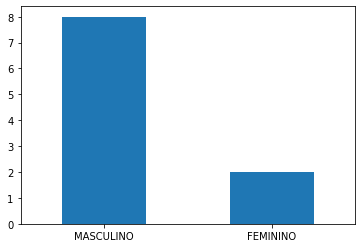

In [101]:
#Colocando isso numa visualização
genero_candidatos_prefeito = candidatos_prefeito_da_cidade['DS_GENERO'].value_counts()
genero_candidatos_prefeito.plot.bar(x='DS_GENERO', rot=0)

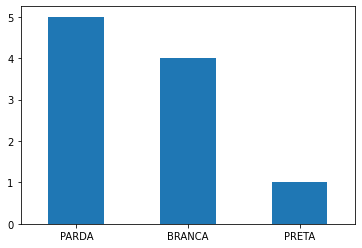

In [105]:
#Colocar em gráfico de barras qualquer uma das categorias
coluna = 'DS_COR_RACA'
coluna_candidatos_prefeito = candidatos_prefeito_da_cidade[coluna].value_counts()
coluna_candidatos_prefeito.plot.bar(x=coluna, rot=0)